# Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.8.4-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
  Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.

In [2]:
import tensorflow as tf
import os

# Remove Suspicious Images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
# allowed image types
image_exts = ['jpeg', 'png', 'bmp', 'jpg']

In [6]:
for folder in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, folder)):
        if imghdr.what(os.path.join(data_dir, folder, file)) not in image_exts:
            print(f"Removing {os.path.join(data_dir, folder, file)}")
            os.remove(os.path.join(data_dir, folder, file))

# Load Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


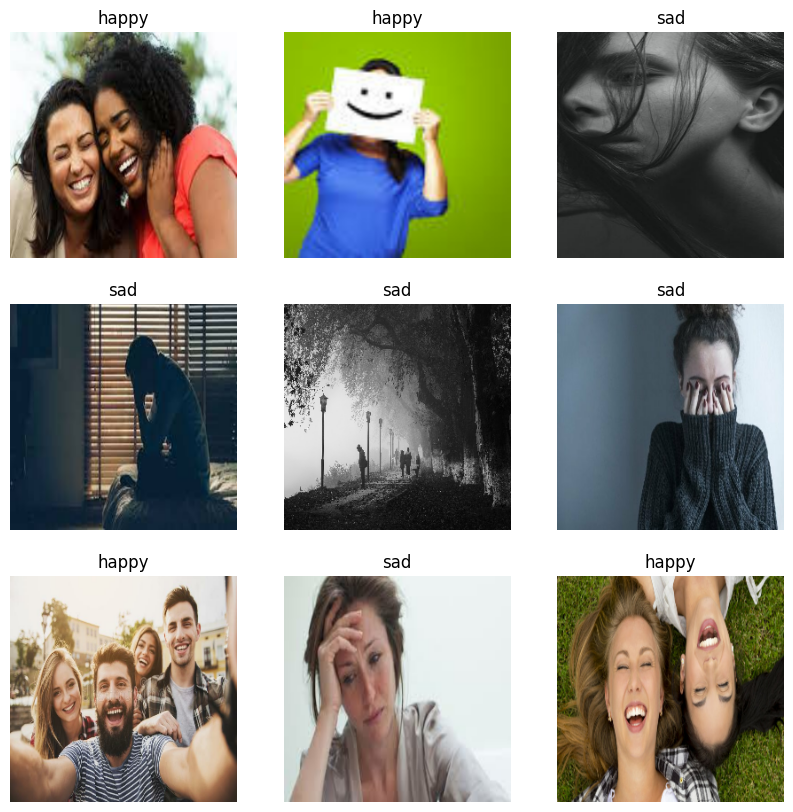

In [14]:
# Display the first 9 images from the dataset with their class names
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data.class_names[labels[i]])
        plt.axis("off")
        

# Scale the Data

In [15]:
# scale the images
data = data.map(lambda x, y: (x / 255.0, y))

In [24]:
len(data) # 10 batches of data with 32 images each

10

# Split the Data

In [25]:
# split the data into training and validation sets
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Build Deep Learning Model

In [27]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [51]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [54]:
# log the training process
log_dir = "logs"

In [55]:
# tensorboard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [56]:
# callback to save best model
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras', save_best_only=True)

In [57]:
# callback to stop training if the validation loss does not improve for 3 epochs
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3)

In [58]:
hist = model.fit(train, validation_data=val, epochs=10, callbacks=[tensorboard_callback, checkpoint_callback, early_stopping_callback])

Epoch 1/10


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 928ms/step - accuracy: 0.4784 - loss: 0.9291 - val_accuracy: 0.6562 - val_loss: 0.6245
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 844ms/step - accuracy: 0.5774 - loss: 0.6784 - val_accuracy: 0.5156 - val_loss: 0.7151
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 739ms/step - accuracy: 0.6145 - loss: 0.6430 - val_accuracy: 0.6094 - val_loss: 0.6306
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 885ms/step - accuracy: 0.7244 - loss: 0.5473 - val_accuracy: 0.6719 - val_loss: 0.5144
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 720ms/step - accuracy: 0.7416 - loss: 0.5058 - val_accuracy: 0.8438 - val_loss: 0.3542
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step - accuracy: 0.8453 - loss: 0.3953 - val_accuracy: 0.8438 - val_loss: 0.3894
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - accuracy: 0.8023 - loss: 0.3933 - val_accuracy: 0.8906 - val_loss: 0.2831
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 712ms/step - accuracy: 0.8853 - loss: 0.2848 - val_accuracy: 0.8906 - val_loss: 0.2391
Ep

# Plot Performance

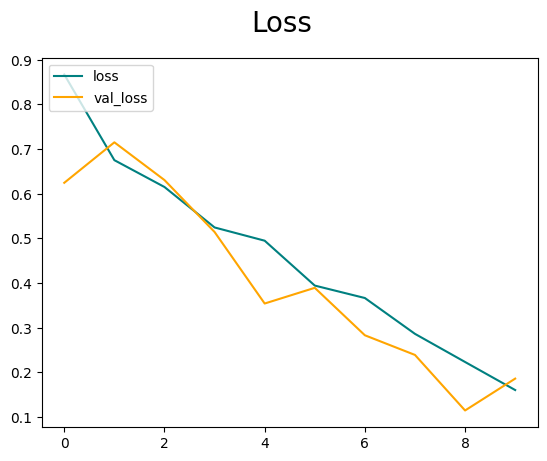

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

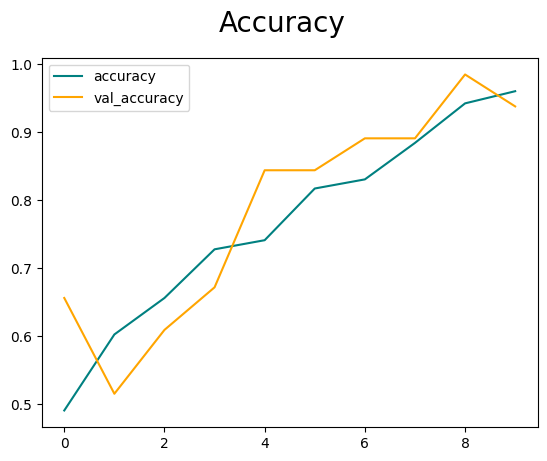

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [61]:
# evaluate the model on the test set
# load the best model
model = tf.keras.models.load_model('best_model.keras')
model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8824 - loss: 0.1796


[0.1796324998140335, 0.8823529481887817]